Có 5 thuộc tính trong dữ liệu:
- Time (thang đo khoảng): không có dấu hiệu Cheat do sự phân bố dữ liệu tương đối phù hợp với thực tế
- UserName (thang đo định danh): dấu hiệu Cheat là một cụm UserName (~1%) có tần số xuất hiện cao gây lệch phân bố
- VisitorID (thang đo định danh): dấu hiệu Cheat là một cụm VisitorID (~1%) có tần số xuất hiện cao gây lệch phân bố
- MediaID (thang đo định danh): dấu hiệu Cheat là một cụm MediaID (~1%) có tần số xuất hiện cao gây lệch phân bố
- ListenTime (thang đo tỷ lệ): dấu hiệu Cheat là một cụm ListenTime (~1%) có gía trị lớn gây lệch phân bố

Do vấn đề của bài toán là tìm cheat của những bài hát có lượt nghe cao (tần số xuất hiện) đột biến so với phân bố nên việc chọn cặp thuộc tính trong dữ liệu để thống kê mối liên hệ cần dựa trên thuộc tính MediaID:
- "MediaID - VisitorID" và "MediaID - UserName" thể hiện mối liên hệ giữa người dùng và bài hát (ví dụ: một VisitorID nghe một bài hát nhiều lần, hoặc nhiều UserName nghe cùng một bài hát,... tạo cho MediaID có tần số xuất hiện lớn)
- "MediaID - ListenTime" xem mối liên hệ giữa bài hát và thời gian nghe (ví dụ: MediaID có ListenTime cao thì có MediaID có tần số xuất hiện cao...)
- "MediaID - Time" xem mối liên hệ giữa bài hát và thời gian được nghe trong ngày (ví dụ: những MediaID có tần số xuất hiện cao thì được nghe vào thời gian nào trong ngày...)

In [1]:
# Read Data
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
f = open('/home/tampd/Downloads/cheatView1207.txt', 'r')
RowDatas = f.read().split('\n')
RawDatas = []
for RowData in RowDatas:
    RawDatas.append(RowData.split('\t'))
Datas = pd.DataFrame(RawDatas, columns = ['Time', 'UserName', 'VisitorID', 'ListenTime', 'TimeBetween'
                                          ,'MediaID', 'IP'])
Datas = Datas[:-1]
f.close()

In [2]:
# Reprocess Data
Datas['ListenTime'][Datas['ListenTime'] == ''] = '0'
Datas['TimeBetween'][Datas['TimeBetween'] == ''] = '0'
Datas[['ListenTime', 'TimeBetween']] = Datas[['ListenTime', 'TimeBetween']].astype(float)

In [3]:
# Exchange 'Time' Property
import numpy as np
temps = np.array(Datas['Time'][:])
for idx, temp in enumerate(temps):
    temps[idx] = float((((temp.split(' '))[1]).split(':'))[0]) 
Datas['Time'] = pd.Series(temps)

In [4]:
# UserName-VisitorID
print (Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique()).apply(lambda x: len(x)).sort_values()
print (Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['UserName'] != ''].groupby('VisitorID').UserName.unique().apply(lambda x: len(x)).quantile(0.99))

print (Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique()).apply(lambda x: len(x)).sort_values()
print (Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['UserName'] != ''].groupby('UserName').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

VisitorID
2000.000236a5c4b42dea74a5.1448771005940.9d58518b     1
2000.aa0e6940af34466a1f25.1433228413532.bf097d17     1
2000.aa0d779928c6c19898d7.1421765096366.5425faeb     1
2000.aa0a1f6364428d1cd453.1455889958264.ecd31cc3     1
2000.aa08f25362898bd7d298.1478696699123.0eb1cd4c     1
2000.aa06d18c64b28decd4a3.1465392759269.d0475c7f     1
2000.aa05657a5daeb4f0edbf.1474125753597.e0bccd88     1
2000.aa03446a0f81e6dfbf90.1480913512982.e84a5dc8     1
2000.aa032e58028cebd2b29d.1474160782460.4760c5a1     1
2000.aa015c99fd4814164d59.1475507172552.6eb7670b     1
2000.a9fa05067ddb9485cdca.1476972126358.ac699eb0     1
2000.a9f4f48fc64d2f13765c.1470023358054.3164b190     1
2000.aa12be10fc7915274c68.1431025222482.66546c9a     1
2000.a9f0843951e9b8b7e1f8.1476013338029.9d16a040     1
2000.a9ea5feba2244b7a1235.1471523464810.657ebff4     1
2000.a9e6faaa44f8ada6f4e9.1419753254609.923ab51f     1
2000.a9e6ce6a73799a27c368.1449542119845.5c4fd9cd     1
2000.a9e5e6c878fb91a5c8ea.1463401723723.f6a363a9     1


In [5]:
#Time
print (Datas.groupby('MediaID').ListenTime.mean()).describe()
print '90%:\t' + str((Datas.groupby('MediaID').ListenTime.mean()).quantile(0.9)/1000)
print '95%:\t' + str((Datas.groupby('MediaID').ListenTime.mean()).quantile(0.95)/1000)
print '99%:\t' + str((Datas.groupby('MediaID').ListenTime.mean()).quantile(0.99)/1000)
print '------------------------FREQUENCY------------------------'
print (Datas.groupby('MediaID').ListenTime.size()).describe()
print '90%:\t' + str((Datas.groupby('MediaID').ListenTime.size()).quantile(0.9))
print '95%:\t' + str((Datas.groupby('MediaID').ListenTime.size()).quantile(0.95))
print '99%:\t' + str((Datas.groupby('MediaID').ListenTime.size()).quantile(0.99))
print '------------------------1% FREQUENCY (ListenTime)------------------------'
key_MediaID = (Datas.groupby('MediaID').ListenTime.size())[Datas.groupby('MediaID').ListenTime.size() >= Datas.groupby('MediaID').ListenTime.size().quantile(0.99)]
#(Datas[Datas['MediaID'].isin(temp.keys().values.tolist())]).describe()
print (Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).describe()
print '90%:\t' + str((Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).quantile(0.9)/1000)
print '95%:\t' + str((Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).quantile(0.95)/1000)
print '99%:\t' + str((Datas[Datas['MediaID'].isin(key_MediaID.keys().values.tolist())].groupby('MediaID').ListenTime.mean()).quantile(0.99)/1000)
#print Datas.groupby('MediaID').get_group(temp.keys()).describe()
#print 'Max:\t' + str((Datas.groupby('MediaID').ListenTime.size()).idxmax()) + '\t' +  str((Datas.groupby('MediaID').ListenTime.size()).max())                                                                              
#print (Datas.groupby('MediaID').get_group(str((Datas.groupby('MediaID').ListenTime.size()).idxmax())))['ListenTime'].describe()

count    1.065170e+05
mean     2.166304e+05
std      1.659393e+06
min      3.000000e+04
25%      7.000000e+04
50%      1.600000e+05
75%      2.299470e+05
max      3.524850e+08
Name: ListenTime, dtype: float64
90%:	287.926470588
95%:	345.0
99%:	1260.0
------------------------FREQUENCY------------------------
count    106517.000000
mean         68.816715
std        2261.387523
min           1.000000
25%           1.000000
50%           3.000000
75%          13.000000
max      499286.000000
dtype: float64
90%:	52.0
95%:	113.0
99%:	675.84
------------------------1% FREQUENCY (ListenTime)------------------------
count    1.066000e+03
mean     2.923509e+05
std      1.109007e+06
min      3.875706e+04
25%      1.895480e+05
50%      2.184779e+05
75%      2.571827e+05
max      3.272037e+07
Name: ListenTime, dtype: float64
90%:	308.234353421
95%:	361.616509563
99%:	874.574717184


In [6]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
# 1 VisitorID - 1 MediaID
print (Datas.groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas.groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas.groupby('VisitorID').MediaID.value_counts()).max())
print (Datas.groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas.groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas.groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas.groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.00003bcdb12c5872013d.1479566576006.6a5ac7ba  5966132          1
2000.8e021771039eeac0b38f.1480388727670.219ea71e  1075772908       1
2000.8e02183574e89db6c4f9.1477004944977.f659d20d  1075785257       1
2000.8e026d4bd18438da6195.1471407347919.1c84c1e9  5996204          1
2000.8e0295ffe08209dc5093.1435997616790.0c77c458  1075228641       1
2000.8e02993f58d5b18be8c4.1481100130034.45b67173  1074213068       1
                                                  1075784817       1
2000.8e02debbfc5715094c46.1480252452291.8ee99707  5494652          1
2000.8e02df8103b2eaecb3a3.1463494716317.45479407  1074659317       1
                                                  1074691894       1
                                                  1074691896       1
2000.8e02127a9945701b2954.1465047055399.149011d8  1075788450       1
2000.8e0310a8ce42271c7e53.1481087756457.14d29234  1075191495       1
2000.8e0333bee25a0b04524b.1479110649194.61

In [7]:
#print (Datas.groupby('VisitorID').MediaID.unique()).apply(lambda x: len(x)).sort_values()
#print (Datas.groupby('VisitorID').MediaID.unique()).apply(lambda x: len(x)).describe()
#print '90%:\t' + str(Datas.groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.9))
#print '95%:\t' + str(Datas.groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.95))
#print '99%:\t' + str(Datas.groupby('VisitorID').MediaID.unique().apply(lambda x: len(x)).quantile(0.99))
# 1 MediaID - n VisitorID
print ((Datas.groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas.groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas.groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas.groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas.groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
1138363           1
3147552           1
3147541           1
3147429           1
3147391           1
3147370           1
3147257           1
3147055           1
3147753           1
3146896           1
3146539           1
3146246           1
3146138           1
3146082           1
3145876           1
3145849           1
3145696           1
3146796           1
3145470           1
3147854           1
3147885           1
3149422           1
3148916           1
3148835           1
3148821           1
3148785           1
3148729           1
3148705           1
3147867           1
3148652           1
              ...  
1075755756     3450
1075765293     3472
1075548426     3608
1075752472     3781
1075507785     3838
1074344478     3885
1075749795     4015
1075455731     4153
1075552481     4702
1074425097     6010
1075465009     6073
1075550468     6146
1075784817     6643
6282518        6682
1075792292     7733
1075771983     8306
1075758867     8389
1075751008    10120
1075785257  

In [8]:
#Datas.groupby('MediaID').ListenTime.unique()

In [9]:
# Clustering with Frequency of MediaID
import numpy as np
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
# Cluster
datas = (Datas['MediaID'].value_counts().values).astype(float)
centroids, _ = kmeans(datas, 2)
idx, _ = vq(datas, centroids)
key_cluter0 = ((Datas['MediaID'].value_counts())[idx == 0]).keys().tolist()
key_cluter1 = ((Datas['MediaID'].value_counts())[idx == 1]).keys().tolist()
Datas[Datas['MediaID'].isin(key_cluter1)]

#print float(idx.sum())/float(len(idx))
#plot(datas[idx==0], 'ob', datas[idx==1], 'or')
#show()

,Time,UserName,VisitorID,ListenTime,TimeBetween,MediaID,IP
1,9,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.6.19
2,8,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.22.188
3,8,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.6.19
4,9,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.6.19
5,9,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.6.19
6,9,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.6.19
7,9,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.6.19
8,8,,2000.00005ddb200ec950901f.1473835704591.8b80af76,90000.0,268740.0,1075771983,10.30.22.188
9,23,,2000.0000a9497e8997d7ce98.1469630411635.bf27b28c,175000.0,171848.0,1075465107,10.30.6.19
10,23,,2000.0000a9497e8997d7ce98.1469630411635.bf27b28c,275000.0,15550.0,1075771528,10.30.22.188


In [10]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
# 1 VisitorID - 1 MediaID
print (Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).max())
print (Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.00003bcdb12c5872013d.1479566576006.6a5ac7ba  5966132          1
2000.5f6c6ce35628bf76e639.1472969449990.b30a7063  1075223738       1
2000.c1c95994e7a90ef757b8.1464146774549.9b988a0c  1074913817       1
2000.c1c967a20e8ae7d4be9b.1459498669703.4a24e9c1  1073752393       1
2000.5f6c5d46e67d0f23566c.1466588640748.6d1328b3  1075438821       1
2000.c1c97250ce3e27607e2f.1430624925496.c2c056dd  5710847          1
2000.9370e6edf1b418ea41a5.1422892995641.9672fa7d  4424022          1
2000.c1c9cdb39a6f73312a7e.1477446422613.2c8c60a6  1073743648       1
2000.c1ca64c982216b7f3230.1480838673442.dbf51c93  1075421893       1
2000.5f6c190f65d88c86d5c9.1474604955475.a3779ee6  1075371247       1
2000.5f6be2234058a906f049.1438567855478.82f2b7b8  1073884036       1
2000.5f6bdcaa1c8ff5d1ac9e.1454146449474.9c98fb42  1075782944       1
2000.5f6bab04fc2b15754c3a.1458260505772.8afcff10  1074972826       1
2000.c1ca99dd3fe0d6be8ff1.1464174210800.23

In [11]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
# 1 VisitorID - 1 MediaID
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).max())
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.809c62e22434cd6a9425.1475050612665.214adc9c  1074108958       1
2000.89f8bb72024eeb10b25f.1464534634357.225886cc  1075779348       1
                                                  1073760666       1
2000.89f8ba8ef4a01dfe44b1.1458649793806.d145adc7  1075224338       1
2000.89f87e1e1329fa77a338.1461897400924.c938dc62  1075771983       1
2000.89f7f8ece825017b5834.1472221870955.8e74319f  1075771528       1
                                                  1075752472       1
                                                  1075475120       1
2000.89f7807af4ba1de444ab.1469419087543.0fc75b82  1075439166       1
2000.89f77bbce1a208fc51b3.1451579832728.535b7ef5  1074959659       1
2000.89f6e596829e6bc0328f.1445334946649.ec1ac150  1075784698       1
2000.89f6cc085edfb781eece.1474764251143.dd719b29  1075771982       1
2000.89f66d1a1cf3f5adace2.1480651918281.d0d0dbd2  1075794054       1
                                          

In [12]:
# 1 MediaID - n VisitorID
print ((Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
99995           1
4894978         1
4894730         1
4894696         1
4894666         1
1075467624      1
1075467648      1
4893465         1
4893440         1
4893405         1
1075467715      1
4893359         1
4893106         1
4892896         1
4892880         1
1075467723      1
4892755         1
489275          1
4892690         1
4892557         1
1075467758      1
1075467765      1
4892395         1
1075467782      1
489235          1
4891651         1
4891481         1
1075467805      1
4895020         1
4895095         1
             ... 
1074986930    379
1075776582    381
1075156298    382
1074398754    383
1075260379    384
1074448600    390
1075218975    391
1074131753    392
1074262283    411
1075421894    413
1073836217    414
1073839150    415
1074693721    429
1073882914    429
1073769179    433
1073839719    435
1074867951    440
1074464275    440
1075769855    444
1074230590    457
1074681564    465
1074800031    466
1074235837    466
1075223738    472
10

In [13]:
# 1 MediaID - n VisitorID
print ((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
1075778801       83
1075541003      111
1075788933      164
6294897         170
1075795976      176
1075788633      188
1075776617      192
1075202123      193
6276214         193
1075787979      195
1074522482      211
1075779639      214
6293605         218
1075778221      230
6253356         243
6285777         252
1075750534      262
1075793752      267
6244920         269
1074788844      272
1075793051      274
6281497         276
1075480153      277
1075249849      278
1075509605      281
1075759928      283
5941948         283
6089557         284
1073742586      287
6045722         296
              ...  
1075755756     3450
1075765293     3472
1075548426     3608
1075752472     3781
1075507785     3838
1074344478     3885
1075749795     4015
1075455731     4153
1075552481     4702
1074425097     6010
1075465009     6073
1075550468     6146
1075784817     6643
6282518        6682
1075792292     7733
1075771983     8306
1075758867     8389
1075751008    10120
1075785257  

In [14]:
#MediaID - ListenTime
print (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).describe()
print '90%:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).quantile(0.9)/1000)
print '95%:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).quantile(0.95)/1000)
print '99%:\t' + str((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').ListenTime.mean()).quantile(0.99)/1000)

count    4.060000e+02
mean     2.429423e+05
std      1.177693e+05
min      8.265044e+04
25%      1.942725e+05
50%      2.228096e+05
75%      2.616331e+05
max      1.864914e+06
Name: ListenTime, dtype: float64
90%:	310.709547175
95%:	362.684746673
99%:	697.584301189


In [16]:
# 'VisitorID' Property

print '------------------------------------------------------------------------'
print Datas[Datas['MediaID'].isin(key_cluter1)]['VisitorID'].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas[Datas['MediaID'].isin(key_cluter1)]['VisitorID'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count                                              4476627
unique                                              391129
top       2000.28cc2c1dd2fd3ba362ec.1479732852895.416a8e72
freq                                                  2109
Name: VisitorID, dtype: object
------------------------FREQUENCY------------------------
2000.28cc2c1dd2fd3ba362ec.1479732852895.416a8e72    2109
2000.4632fb4e652d8c73d53c.1428632301775.cb174923    1880
2000.88d902f6fc15154b4c04.1479900113410.c766d81b    1658
2000.c6d65f50b35e5a00034f.1444575680418.d0cc40bb    1410
2000.1eadcae21efbf7a5aeea.1452183291417.5561c780    1359
2000.8e0f8a3049e0a0bef9f1.1476058996337.15e07269    1308
2000.864c03428b9762c93b86.1474014574509.110d2aa7    1264
2000.950e41b3995a7004294b.1480723046568.08827304    1153
2000.c08a92e0acc1459f1cd0.1455772006048.5b3c12a0    1113
2000.720b93443861d13f8870.1453954924167.8d952de7     986
2000.c72e549eb37d5a23036c.147991

In [17]:
# 'ListenTime' Property

# Before Denoise
print '------------------------------------------------------------------------'
# Mode
print 'Mode:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].mode()/1000)
# Mean, 25%, 50%, 75%
print Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].describe()
# 90%
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].quantile(0.9)/1000)
# 95%
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].quantile(0.95)/1000)
# 99%
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].quantile(0.99)/1000)

# Variance
print 'Variance:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].var()/1000)
# Skewness
print 'Skewness:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].skew())
# Kurtosis
print 'Kurtosis:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['ListenTime'].kurt())

------------------------------------------------------------------------
Mode:	0    270.0
dtype: float64
count    4.476627e+06
mean     2.531341e+05
std      1.411198e+06
min      3.000000e+04
25%      1.600000e+05
50%      2.250000e+05
75%      2.700000e+05
max      1.093945e+09
Name: ListenTime, dtype: float64
90%:	315.0
95%:	330.0
99%:	465.0
Variance:	1991479367.04
Skewness:	209.186349014
Kurtosis:	111480.859647


In [18]:
print '------------------------------------------------------------------------'
print Datas['Time'].describe()
# Mean
print 'Mean:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].mean())
# Variance
print 'Variance:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].var())
# Standard Deviation
print 'Standard Deviation:\t' + str(Datas['Time'].std())
# 25%
print '25%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.25))
# 50%
print '50%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.5))
# 75%
print '75%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.75))
# 90%
print '90%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.9))
# 95%
print '95%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.95))
# 99%
print '99%:\t' + str(Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].quantile(0.99))

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count     7330150.0
unique         24.0
top            15.0
freq       547241.0
Name: Time, dtype: float64
Mean:	14.3427006539
Variance:	26.9981738905
Standard Deviation:	5.22995009144
25%:	11.0
50%:	15.0
75%:	18.0
90%:	21.0
95%:	22.0
99%:	23.0
------------------------FREQUENCY------------------------
15.0    337666
16.0    327530
14.0    315234
13.0    296632
17.0    285118
10.0    284423
11.0    283881
20.0    274058
12.0    270317
18.0    261606
19.0    248320
9.0     236904
21.0    234084
22.0    196366
8.0     150592
23.0    129892
0.0      80993
7.0      71551
1.0      51431
2.0      34913
6.0      32789
3.0      26046
5.0      23766
4.0      22515
Name: Time, dtype: int64
count        24.000000
mean     186526.125000
std      114607.674398
min       22515.000000
25%       66521.000000
50%      235494.000000
75%      284016.500000
max      337666.000000
Name: Time, dtype: float64
90%: 309653.4
95%: 325685.6


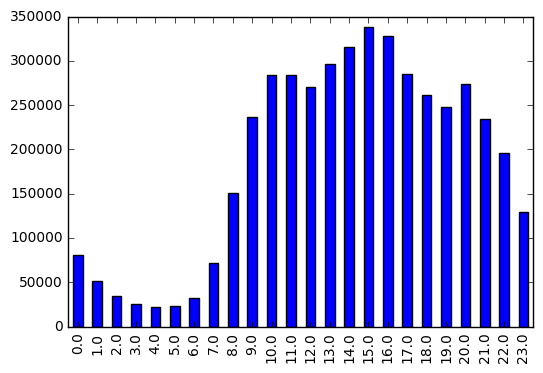

In [35]:
import matplotlib.pyplot as plt
((Datas[Datas['MediaID'].isin(key_cluter1)]['Time'].value_counts()).sort_index()).plot.bar()
plt.show()

In [20]:
#Clustering with 1 Media - n VisitorID
t_datas = (Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).values.astype(float)
t_centroids, _ = kmeans(t_datas, 2)
t_idx, _ = vq(t_datas, t_centroids)
t_key_cluter0 = (((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)))[t_idx == 0]).keys().tolist()
t_key_cluter1 = (((Datas[Datas['MediaID'].isin(key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)))[t_idx == 1]).keys().tolist()
Datas[Datas['MediaID'].isin(t_key_cluter1)]

,Time,UserName,VisitorID,ListenTime,TimeBetween,MediaID,IP
10,23,,2000.0000a9497e8997d7ce98.1469630411635.bf27b28c,275000.0,15550.0,1075771528,10.30.22.188
28,19,,2000.0001c98ce3790a275368.1481111245282.65249d1d,295000.0,295674.0,1075758987,10.30.22.188
29,18,,2000.0001c98ce3790a275368.1481111245282.65249d1d,295000.0,291070.0,1075758987,10.30.6.19
30,20,,2000.0001c98ce3790a275368.1481111245282.65249d1d,295000.0,295822.0,1075758987,10.30.6.19
31,18,,2000.0001c98ce3790a275368.1481111245282.65249d1d,300000.0,0.0,1075758987,10.30.6.19
32,19,,2000.0001c98ce3790a275368.1481111245282.65249d1d,295000.0,295648.0,1075758987,10.30.6.19
33,19,,2000.0001c98ce3790a275368.1481111245282.65249d1d,295000.0,3051684.0,1075758987,10.30.6.19
39,20,,2000.0001cb46d4b33ded64a2.1481116011717.474fa4c6,180000.0,134435.0,1075772551,10.30.6.19
63,16,,2000.000224cdcb25227b7b34.1480835616704.ffd10eee,160000.0,162659.0,1075794399,10.30.22.188
65,17,,2000.000224cdcb25227b7b34.1480835616704.ffd10eee,250000.0,321387.0,1075757848,10.30.22.188


In [21]:
print ((Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
1075778801       83
1075541003      111
1075788933      164
6294897         170
1075795976      176
1075788633      188
1075776617      192
1075202123      193
6276214         193
1075787979      195
1074522482      211
1075779639      214
6293605         218
1075778221      230
6253356         243
6285777         252
1075750534      262
1075793752      267
6244920         269
1074788844      272
1075793051      274
6281497         276
1075480153      277
1075249849      278
1075509605      281
1075759928      283
5941948         283
6089557         284
1073742586      287
6045722         296
              ...  
1075496590     2701
1075771538     2753
1075759252     2850
1075399196     3062
1075458713     3131
1075749994     3329
1075752311     3363
1073981322     3394
1075796111     3439
1075755756     3450
1075765293     3472
1075548426     3608
1075752472     3781
1075507785     3838
1074344478     3885
1075749795     4015
1075455731     4153
1075552481     4702
1074425097  

In [22]:
print ((Datas[Datas['MediaID'].isin(t_key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x))).sort_values()
print (Datas[Datas['MediaID'].isin(t_key_cluter1)].groupby('MediaID').VisitorID.unique()).apply(lambda x: len(x)).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter1)].groupby('MediaID').VisitorID.unique().apply(lambda x: len(x)).quantile(0.99))

MediaID
1075794399    12796
1075757848    14981
1075758987    17063
1075771982    22491
1075793052    24733
1075794054    26748
1075791766    30973
1075772551    38888
1075771528    76531
Name: VisitorID, dtype: int64
count        9.000000
mean     29467.111111
std      19449.091620
min      12796.000000
25%      17063.000000
50%      24733.000000
75%      30973.000000
max      76531.000000
Name: VisitorID, dtype: float64
90%:	46416.6
95%:	61473.8
99%:	73519.56


In [23]:
#print ((Datas[['VisitorID', 'MediaID']].groupby(['MediaID' ,'VisitorID'])).mode())
print (Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts()).sort_values()
print 'Mode:\t' + str((Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts()).idxmax()) + '\t' + str((Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts()).max())
print (Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts()).describe()
print '90%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.9))
print '95%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.95))
print '99%:\t' + str(Datas[Datas['MediaID'].isin(t_key_cluter0)].groupby('VisitorID').MediaID.value_counts().quantile(0.99))

VisitorID                                         MediaID   
2000.fffff276019be8c5b18a.1480215448858.6b7ed018  1075749994       1
2000.b2e03b65f7b31eed47a2.1475238936846.1c933fec  1075784308       1
2000.b2dfd735edee04b05dff.1478408108905.10310bb3  1075785257       1
2000.57cff69ecba922f77bb8.1461742401929.e3786b49  1075251906       1
2000.b2dfd735edee04b05dff.1478408108905.10310bb3  1075363598       1
                                                  1074605906       1
2000.57d02de9b5cf5c9105de.1455594596010.5fe184d1  6295383          1
2000.b2dfd735edee04b05dff.1478408108905.10310bb3  1074546076       1
2000.57d076347fc1969fcfd0.1481122714604.d9deb35f  1075771983       1
2000.b2dfd735edee04b05dff.1478408108905.10310bb3  1074181714       1
2000.b2dfb8109de574bb2df4.1481112554185.73c898d2  1075779819       1
2000.57d1b0d9e43f0d61542e.1479365364193.dfcb2cb6  1075782997       1
2000.57cefb65fd8714d94d96.1479985338050.fcba369d  1075749795       1
2000.57d1f0e7ff0816564f19.1480394376155.a2

In [24]:
print '------------------------------------------------------------------------'
print Datas[Datas['MediaID'].isin(t_key_cluter0)]['MediaID'].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas[Datas['MediaID'].isin(t_key_cluter0)]['MediaID'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))


------------------------------------------------------------------------
count        2687885
unique           397
top       1075782997
freq           71611
Name: MediaID, dtype: object
------------------------FREQUENCY------------------------
1075782997    71611
1075792292    70711
1075752246    58828
1075785257    54585
6282518       49595
1075751008    43786
1075784817    42584
1075771983    41706
1075758867    39788
1075465009    33073
1074425097    31916
1075550468    30920
1075794564    28606
1075796111    27823
1075755756    26508
1075749994    25913
1075552481    25051
1075796186    22273
1075765293    21551
1075752472    21029
1075455731    19015
1075458713    18537
1075548426    18534
6281394       17931
1075790122    17356
1075749795    17206
1074344478    17127
1075752311    16283
1075779294    16040
1075779348    16030
              ...  
1075492084     2057
1075507746     2048
6089557        2046
1074945516     2046
1075552249     2045
1075452609     2042
1073860703     2

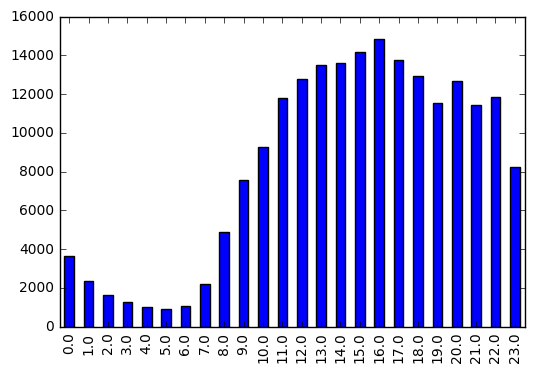

In [33]:
list_media = ['1075793052']
((Datas[Datas['MediaID'].isin(list_media)]['Time'].value_counts()).sort_index()).plot.bar()
plt.show()